In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('IPL2016 (1).csv')
df.head()

,Unnamed: 0,overall_sr,won
0,1,168.817204,1
1,2,165.432099,0
2,3,121.568627,0
3,4,149.541284,1
4,5,151.898734,0


In [35]:
# Separating the features and the target variable
X = df[['overall_sr']].values
y = df['won'].values

# Logistic Regression

In [36]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        cost_history[i] = cost_function(X, y, theta)

    return theta, cost_history

In [37]:
# Initialize parameters
theta = np.zeros(X.shape[1])
learning_rate = 0.01
iterations = 1000

# Train the model
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

<ipython-input-36-01a0f6ec5d49>:9: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-36-01a0f6ec5d49>:9: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


In [38]:
# Function to predict probability
def predict_win_probability(strike_rate):
    log_odds = intercept + coefficient * strike_rate
    odds = np.exp(log_odds)
    probability = odds / (1 + odds)
    return probability

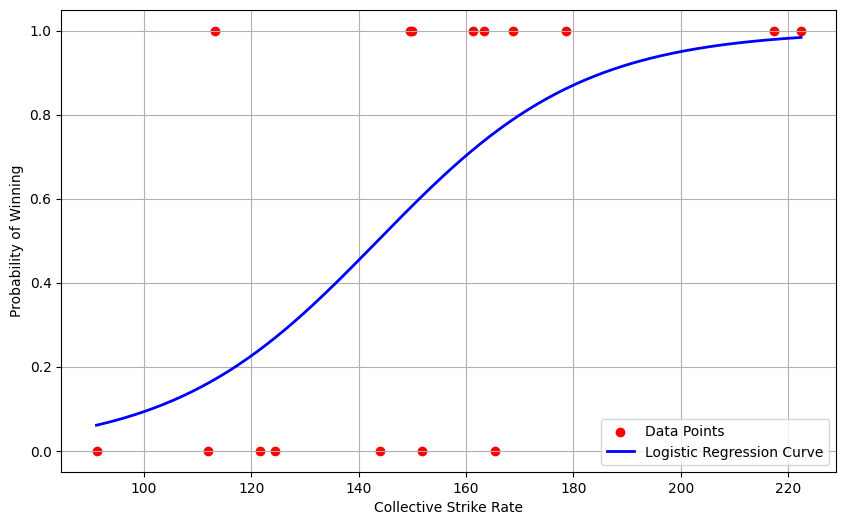

In [45]:
# Plot the logistic regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(strike_rate_range, predicted_probabilities, color='blue', linewidth=2, label='Logistic Regression Curve')
plt.xlabel('Collective Strike Rate')
plt.ylabel('Probability of Winning')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# Testing the function
test_strike_rate = 150
win_probability = predict_win_probability(test_strike_rate)
print(f'Predicted win probability for a strike rate of {test_strike_rate}: {win_probability:}')

Predicted win probability for a strike rate of 150: 0.5831793325019775
